In [3]:
from adtk.detector import SeasonalAD
from adtk.data import validate_series
from adtk.visualization import plot
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Setting an item of incompatible dtype")

<h1 style="text-align: center;">Anomaly Detection Toolkit (movement outliers)</h1>


### What's an outlier ?

An outlier is a observation or data point whose value is significantly diferent from others.
They can occur due to various reasons, such as measurements errors, exeperimental errors, or natural 
variablility in data.

In a typical time series, data are collected or recorded over sucessive time intervals with each data representing a observation taken in a specific time. In a time series each data point that is collected is typically related to the previous one in some way, refleting the evolution of the phenomenon being measured.

However, when detection outliers in a time series we treat each point of data time series is treated independently of the time.

There are various types of anomalys, outliers are the most basic ones where the value of a specific point is significantly different from others. 
Spikes are abrut and temporary increases or decreases in a value of a data point when compared to its neighboring points, they are sudden, shor-term fluctuations in the data being measured.
In the other hand level shifts in comparison with spikes are a more permanent change in the values of a data point compared with the previous levels unlike spikes they represent a more sustained change in the data being mesured.

### Univariate vs Multivariate Anomaly Detection

Univariate anomaly detection involves analyzing a single variable or dimensions of a time series, its used for example when detecting a anomalys in the temperature and only that variable. 

Multivariate anomaly detection involves analyzing multiple variables or dimensions of data in a time series simultaneously, where in many cases the anomaly detection can be separated across series. Meaning that you can independently detect anomalies in each time series (temperature and humidity) and then aggregate the results.

Thre is also intrinsic multivariate algorithms were anomalys cannot be detected by analyzing individual dimensions seperatly, in this cases the variables are have relationships that affect each other. Its used when for example when detection anomalies in the heat index, that is based in both temperature and humidity.

In [5]:
# Load the dataset
sleeping_data = pd.read_csv("sleeping_data_not_normal.csv")

# convert to pandas date time 
sleeping_data['date'] = pd.to_datetime(sleeping_data['date'])
# Convert the 'date' column to datetime and set it as the index
sleeping_data = sleeping_data.set_index("date")

print(sleeping_data)

# get each axix data
x_axis_data = sleeping_data["x"]
y_axis_data = sleeping_data["y"]
z_axis_data = sleeping_data["z"]

# validating series
x_train = validate_series(x_axis_data)
y_train = validate_series(y_axis_data)
z_train = validate_series(z_axis_data)

                               x     y     z
date                                        
2024-03-22 21:14:26.927464  6.64 -0.48 -6.96
2024-03-22 21:14:27.334157  7.71  0.32 -5.89
2024-03-22 21:14:28.342504  8.59  0.74 -4.61
2024-03-22 21:14:29.333043  9.16  0.90 -3.38
2024-03-22 21:14:30.315541  8.92  1.66  3.61
...                          ...   ...   ...
2024-03-22 21:16:21.312772  2.90 -9.30  0.29
2024-03-22 21:16:22.528336  2.52 -9.43 -2.08
2024-03-22 21:16:23.259309  3.88 -8.94  0.59
2024-03-22 21:16:24.290579  3.98 -8.95  0.17
2024-03-22 21:16:25.502654  2.08 -9.63 -0.24

[120 rows x 3 columns]


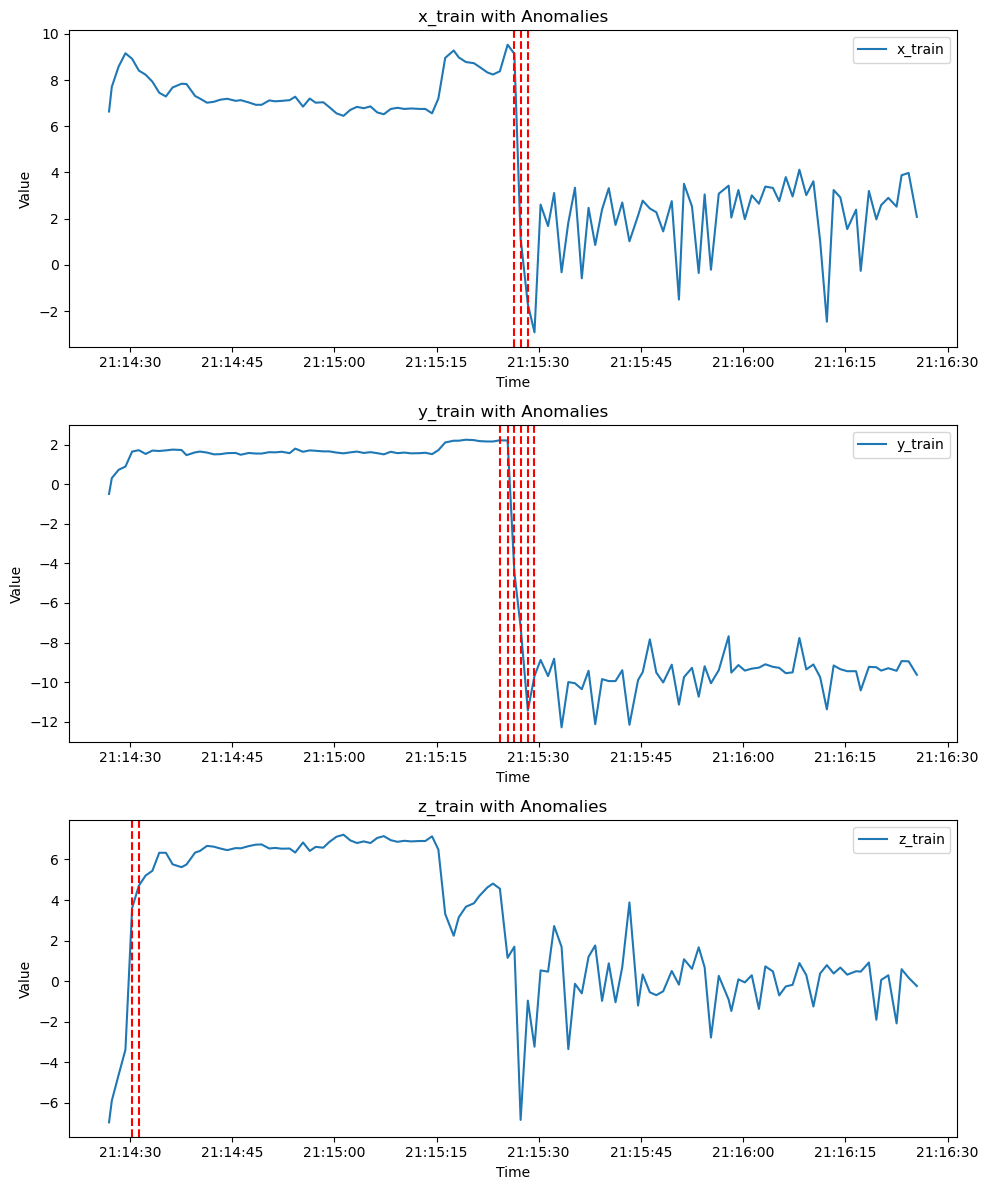

In [6]:
import matplotlib.pyplot as plt
from adtk.detector import LevelShiftAD

# Assuming anomalies_x, anomalies_y, and anomalies_z are your anomaly detection results for x_train, y_train, and z_train respectively
# You need to replace anomalies_x, anomalies_y, and anomalies_z with your actual anomaly detection results

# Create and fit the LevelShiftAD detector for x_train
level_shift_ad_x = LevelShiftAD(c=6.0, side='both', window=4)
anomalies_x = level_shift_ad_x.fit_detect(x_train)

# Create and fit the LevelShiftAD detector for y_train
level_shift_ad_y = LevelShiftAD(c=6.0, side='both', window=4)
anomalies_y = level_shift_ad_y.fit_detect(y_train)

# Create and fit the LevelShiftAD detector for z_train
level_shift_ad_z = LevelShiftAD(c=6.0, side='both', window=4)
anomalies_z = level_shift_ad_z.fit_detect(z_train)

# Filter out NaN values from anomalies
non_nan_anomalies_x = anomalies_x.dropna()
non_nan_anomalies_y = anomalies_y.dropna()
non_nan_anomalies_z = anomalies_z.dropna()

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot x_train with detected anomalies
axs[0].plot(x_train, label='x_train')
for anomaly_idx, anomaly in non_nan_anomalies_x.items():
    if anomaly: 
        axs[0].axvline(x=anomaly_idx, color='red', linestyle='--')
axs[0].set_title('x_train with Anomalies')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].legend()

# Plot y_train with detected anomalies
axs[1].plot(y_train, label='y_train')
for anomaly_idx, anomaly in non_nan_anomalies_y.items():
    if anomaly: 
        axs[1].axvline(x=anomaly_idx, color='red', linestyle='--')
axs[1].set_title('y_train with Anomalies')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].legend()

# Plot z_train with detected anomalies
axs[2].plot(z_train, label='z_train')
for anomaly_idx, anomaly in non_nan_anomalies_z.items():
    if anomaly: 
        axs[2].axvline(x=anomaly_idx, color='red', linestyle='--')
axs[2].set_title('z_train with Anomalies')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Value')
axs[2].legend()

plt.tight_layout()
plt.show()


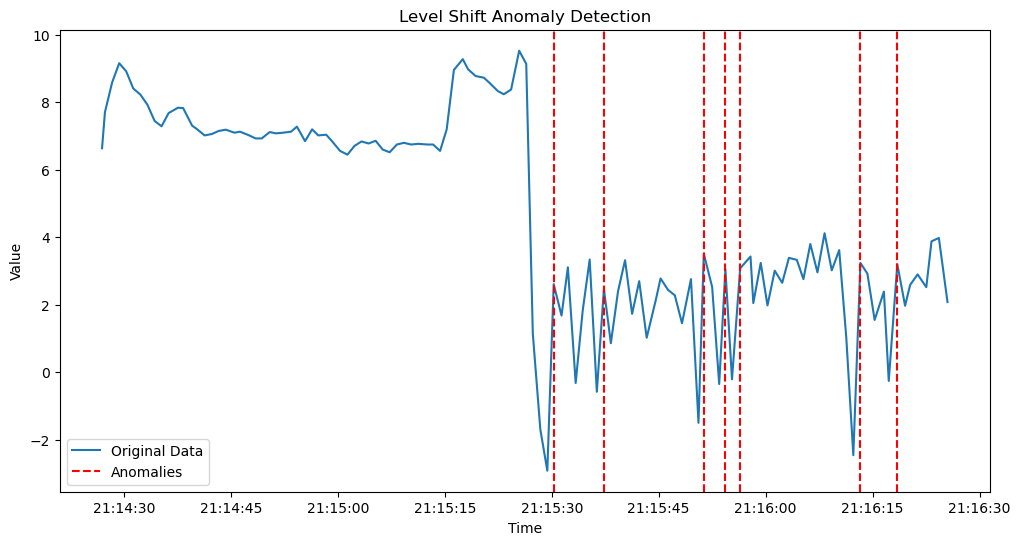

In [9]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=1.0, side='positive')
anomalies = persist_ad.fit_detect(x_train)

non_nan_anomalies = anomalies.dropna()

# Plot the training data
plt.figure(figsize=(12, 6))
plt.plot(x_train, label='Original Data')

# Plot vertical lines for non-NaN anomalies
for anomaly_idx, anomaly in non_nan_anomalies.items():
    if anomaly:  # Check if the anomaly is True
        plt.axvline(x=anomaly_idx, color='red', linestyle='--')

plt.title('Level Shift Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Original Data', 'Anomalies'])  # Provide legend labels here
plt.show()
